In [4]:
import numpy as np
import matplotlib.pyplot as plt
class MDP:
    def __init__(self):
        self.states = ['s0', 's1', 's2']
        self.actions = ['a0', 'a1']

        # Transition probabilities (next_state, probability)
        self.transitions = {
            's0': {
                'a0': [('s1', 0.8), ('s2', 0.2)],
                'a1': [('s0', 1.0)]
            },
            's1': {
                'a0': [('s0', 0.5), ('s2', 0.5)],
                'a1': [('s1', 1.0)]
            },
            's2': {
                'a0': [('s0', 1.0)]
            }
        }

        # Rewards for each (state, action, next_state) pair
        self.rewards = {
            ('s0', 'a0', 's1'): 5,
            ('s0', 'a0', 's2'): 10,
            ('s0', 'a1', 's0'): 1,
            ('s1', 'a0', 's0'): 3,
            ('s1', 'a0', 's2'): 2,
            ('s1', 'a1', 's1'): 0,
            ('s2', 'a0', 's0'): 4,
        }


In [5]:
class MDPWithTransitionProbabilities(MDP):
    def __init__(self):
        super().__init__()

    def transition_probability(self, current_state, action, next_state):
        if current_state in self.transitions and action in self.transitions[current_state]:
            total_prob = 0
            for next_state_tuple, prob in self.transitions[current_state][action]:
                if next_state_tuple == next_state:
                    total_prob += prob
            return total_prob
        return 0

# Create MDP instance with transition probability calculation
mdp_transition_prob = MDPWithTransitionProbabilities()

# Example usage
current_state = 's0'
action = 'a0'
next_state = 's1'
probability = mdp_transition_prob.transition_probability(current_state, action, next_state)
print(f"P(S'={next_state} | S={current_state}, A={action}) = {probability}")


P(S'=s1 | S=s0, A=a0) = 0.8


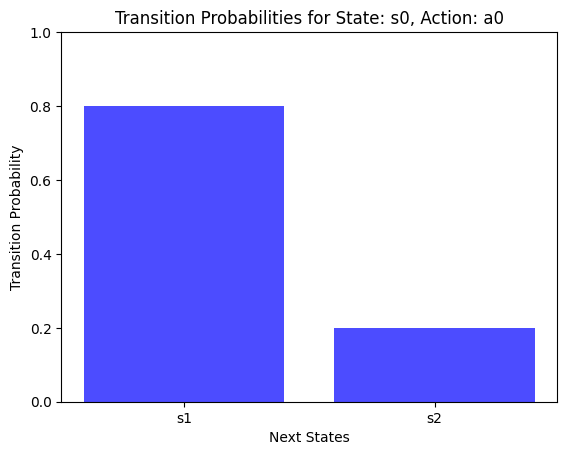

In [6]:
def plot_transition_probabilities(mdp_instance, state, action):
    next_states = []
    probabilities = []

    if state in mdp_instance.transitions and action in mdp_instance.transitions[state]:
        for next_state, prob in mdp_instance.transitions[state][action]:
            next_states.append(next_state)
            probabilities.append(prob)

    x = np.arange(len(next_states))

    plt.bar(x, probabilities, tick_label=next_states, color='b', alpha=0.7)
    plt.xlabel('Next States')
    plt.ylabel('Transition Probability')
    plt.title(f'Transition Probabilities for State: {state}, Action: {action}')
    plt.ylim(0, 1)
    plt.show()

# Example usage
plot_transition_probabilities(mdp_transition_prob, 's0', 'a0')
